In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 39.4 MB/s 


In [ ]:
import pyupbit

In [ ]:
df = pyupbit.get_ohlcv("KRW-XRP", interval="minute1")

#df = df.drop(["open", "high", "low", "volume", "value"], axis=1)

df = df.reset_index().rename(columns={"index": "ds"})
df = df.rename(columns={"close": "y"})
print(df)


                     ds    open    high  ...       y        volume         value
0   2021-08-23 15:09:00  1445.0  1450.0  ...  1445.0  2.635342e+05  3.809834e+08
1   2021-08-23 15:10:00  1445.0  1450.0  ...  1445.0  8.211351e+04  1.187973e+08
2   2021-08-23 15:11:00  1450.0  1450.0  ...  1445.0  7.268480e+04  1.050680e+08
3   2021-08-23 15:12:00  1445.0  1450.0  ...  1445.0  1.565235e+05  2.267658e+08
4   2021-08-23 15:13:00  1450.0  1450.0  ...  1450.0  1.276716e+05  1.846682e+08
..                  ...     ...     ...  ...     ...           ...           ...
195 2021-08-23 18:24:00  1495.0  1500.0  ...  1495.0  1.177072e+05  1.762571e+08
196 2021-08-23 18:25:00  1495.0  1500.0  ...  1500.0  1.413266e+06  2.113268e+09
197 2021-08-23 18:26:00  1495.0  1500.0  ...  1495.0  3.856737e+05  5.776773e+08
198 2021-08-23 18:27:00  1495.0  1500.0  ...  1495.0  9.683721e+05  1.447900e+09
199 2021-08-23 18:28:00  1495.0  1500.0  ...  1495.0  2.766953e+05  4.136834e+08

[200 rows x 7 columns]


In [ ]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=60, freq='min')
print(future.shape)
print(future)

(260, 1)
                     ds
0   2021-08-23 15:09:00
1   2021-08-23 15:10:00
2   2021-08-23 15:11:00
3   2021-08-23 15:12:00
4   2021-08-23 15:13:00
..                  ...
255 2021-08-23 19:24:00
256 2021-08-23 19:25:00
257 2021-08-23 19:26:00
258 2021-08-23 19:27:00
259 2021-08-23 19:28:00

[260 rows x 1 columns]


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                     ds         yhat   yhat_lower   yhat_upper
0   2021-08-23 15:09:00  1446.956435  1442.437230  1451.696917
1   2021-08-23 15:10:00  1446.714006  1442.106305  1451.339454
2   2021-08-23 15:11:00  1446.471577  1441.940493  1451.234855
3   2021-08-23 15:12:00  1446.229147  1441.614960  1451.096724
4   2021-08-23 15:13:00  1445.986718  1441.671700  1450.605807
..                  ...          ...          ...          ...
255 2021-08-23 19:24:00  1468.995124  1426.714707  1509.845814
256 2021-08-23 19:25:00  1468.590173  1426.297157  1510.244470
257 2021-08-23 19:26:00  1468.185223  1424.163717  1512.455603
258 2021-08-23 19:27:00  1467.780272  1422.487908  1512.564924
259 2021-08-23 19:28:00  1467.375321  1421.922480  1514.162123

[260 rows x 4 columns]


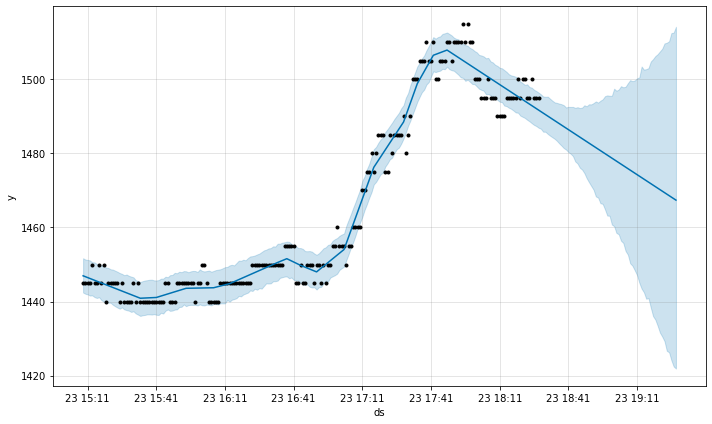

In [ ]:
fig1 = model.plot(forecast)

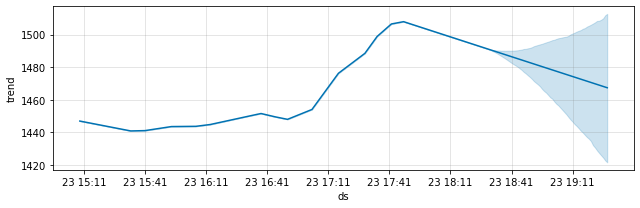

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)